In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("drive/MyDrive/Datasets/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [57]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


## Identify missing values and fill it with the mean.

In [58]:
if df.isnull().values.any():
  print("Null values present")
else:
  print("No null values")

No null values


## Find out how the data is skewed and identify the kurtosis value

In [59]:
df.skew(numeric_only=True)

Series([], dtype: float64)

In [60]:
df.kurt(numeric_only=True)

Series([], dtype: float64)

## Categorical and Numerical Data

In [61]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Columns", numerical_cols)
print("Categorical Columns", cat_cols)

Numerical Columns []
Categorical Columns ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


## Label Encoding for categorical data

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
  df[col] = le.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Identify the outliers and plot it.

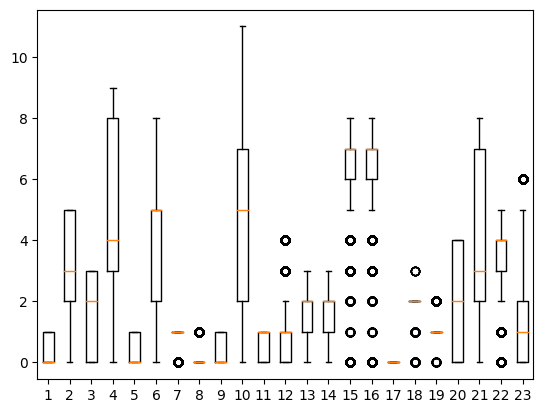

In [63]:
# plot the boxplot for all columns
# plt.boxplot(df.values, labels=df.columns)
plt.boxplot(df.values)
print()

In [64]:
## Remove outliers
# print("rows before removal", df.shape[0])

# from scipy import stats

# new_df = df

# for col in df.columns:
#   z_scores = stats.zscore(df[col])
#   threshold = 15
#   new_df = new_df[(z_scores < threshold)]

# print("rows after removal", new_df.shape[0])

# print("rows before removal", df.shape[0])
# for col in df.columns:
#   mean = df[col].mean()
#   std_dev = df[col].std()

#   # Define threshold as 2 standard deviations
#   threshold = 3 * std_dev

#   # Filter out outliers
#   df = df[(df[col] > mean - threshold) & (df[col] < mean + threshold)]

# print("rows after removal", df.shape[0])
print(df.shape)
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df2 = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(df2.shape)

(8124, 23)
(3600, 23)


## Scaling

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = df.drop(['class'], axis=1)
y = df['class']

X = scaler.fit_transform(X)



## Prepare data for modelling

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear Regression Model

In [67]:
from sklearn import svm

linear = svm.SVC(kernel='linear').fit(X_train, y_train)
poly = svm.SVC(kernel='poly').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid').fit(X_train, y_train)

## Prediction

In [68]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.9762100082034455
Accuracy Polynomial Kernel: 1.0
Accuracy Radial Basis Kernel: 1.0
Accuracy Sigmoid Kernel: 0.8117309269893355


## Perfomance Analysis

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(confusion_matrix(y_test, linear.predict(X_test)))
print(confusion_matrix(y_test, poly.predict(X_test)))
print(confusion_matrix(y_test, rbf.predict(X_test)))
print(confusion_matrix(y_test, sig.predict(X_test)))

[[1262   25]
 [  33 1118]]
[[1287    0]
 [   0 1151]]
[[1287    0]
 [   0 1151]]
[[1060  227]
 [ 232  919]]
